# Other commonly used distributions and sample statistics
*ELEC-C5212* - Johdatus signaalien tilastolliseen mallintamiseen  / Esa Ollila

Besides Gaussian distribution and the Binomial distribution, which are prominent examples of continuous and discrete distribution, we will encounter in this course many other distributions which we briefly review in this notebook, namely:
1. Exponential distribution $\mathrm{Exp}(\lambda)$
2. Laplace distribution $\mathrm{Lap}(\mu.\sigma)$  
3. Uniform distribution $\mathrm{Unif}(a,b)$ 
4. Poisson distribution $\mathrm{Poisson}(\lambda)$ 

In [3]:
# Librararies we need to import 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy.stats import expon, laplace, norm, uniform, poisson
np.random.seed(0)

sns.set_context("poster")
sns.set_style("whitegrid") 
rc("text", usetex=True)
rc('lines', linewidth=2.5)

## 1. Exponential distribution

* A contiuous RV $X$ with support on $[0,\infty)$ is said to follow an *Exponential distribution* with (rate) parameter $\lambda>0$ if its pdf is of the form
$$
f_X(x) = \lambda e^{-\lambda x},\quad x\geq 0
$$

* We denote this case by $X\sim \mathrm{Exp}(\lambda)$

* The cdf (cumulative density function) is 
$$
F_X(x) = \int_0^x f_X(t)dt = 1-e^{-\lambda x}.
$$

* Some moments of the $\mathrm{exp}(\lambda)$ distribution are:
 * mean: $\mathrm{E}[X] =  1/\lambda$
 * variance: $\mathrm{var}(X)= 1/\lambda^2$
 * skewness: $\gamma_1(X)=2$
 * kurtosis: $\gamma_2^{\mathrm{ex}}(X)=6$

* The exponential distribution is central in survival analysis problems due to its [memoryless property](https://en.wikipedia.org/wiki/Memorylessness):
$$
\Pr(X > s + t| X > s) = \Pr(X > t), \,\forall s, t \geq 0
$$

* For example, the complex Gaussian RV $X=X_R + \jmath X_I$ has the property that its amplitude squared has an Exponential distribution:  
$$
| X |^2 = X^* X  \sim \mathrm{Exp}(1)
$$
where $X^* = X_R - \jmath X_I$ is the complex conjugate of $X$.

* The amplitude (modulus) $|X|=\sqrt{X_R^2 + X_i^2}$ then has the *Rayleigh distribution* with scale $1/\sqrt{2}$, denoted $| X |\sim \mathrm{Rayl}(1/\sqrt{2})$. 

### Plotting the pdf of $\mathrm{Exp}(\lambda)$ distribution for some values of $\lambda=1/\mu$

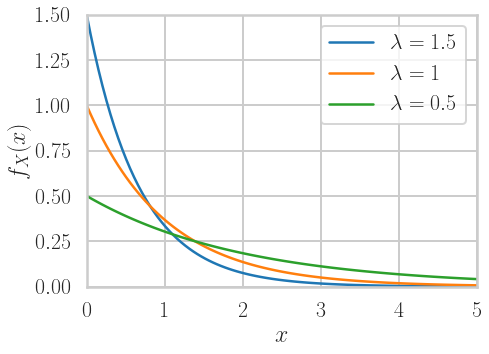

In [4]:
x = np.linspace(0,5,100)
plt.figure(figsize=(7,5))
plt.plot(x,expon(scale=1/1.5).pdf(x))
plt.plot(x,expon(scale=1).pdf(x))
plt.plot(x,expon(scale=2).pdf(x))
plt.legend(["$\lambda=1.5$", "$\lambda=1$", "$\lambda=0.5$"])
plt.xlabel("$x$"), plt.ylabel("$f_X(x)$")
plt.xlim([0,5]), plt.ylim([0,1.5])
plt.show()

### Plotting the cdf of $\mathrm{Exp}(\lambda)$ distribution for some values of $\lambda=1/\mu$

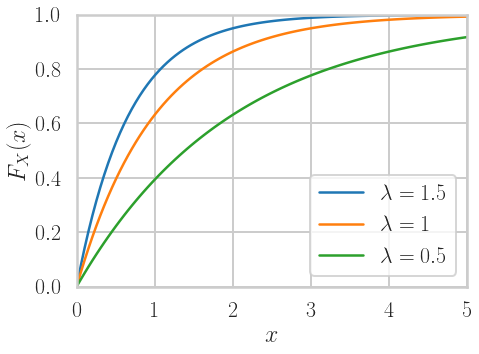

In [4]:
x = np.linspace(0,5,100)
plt.figure(figsize=(7,5))
plt.plot(x,expon(scale=1/1.5).cdf(x))
plt.plot(x,expon(scale=1).cdf(x))
plt.plot(x,expon(scale=2).cdf(x))
plt.legend(["$\lambda=1.5$", "$\lambda=1$", "$\lambda=0.5$"])
plt.xlabel("$x$"), plt.ylabel("$F_X(x)$")
plt.xlim([0,5]), plt.ylim([0,1])
plt.show()

## 2. Laplace (double exponential) distribution

* A continuous RV $X$ with support on $\mathbb{R}$ is said to have a *Laplace distribution* with symmetry center $\mu\in \mathbb{R}$ and scale $\sigma<0$ if its pdf is of the form 
$$
f_X(x) = \frac{1}{2\sigma}\exp\left\{-\frac{-|x-\mu|}{\sigma}\right\},\,x\in\mathbb{R}
$$

* We denote this case by $X\sim\mathrm{Lap}(\mu,\sigma)$

* The family of Laplace distributions $\{ \mathrm{Lap}(\mu,\sigma) : \mu \in \mathbb{R}, \sigma>0 \}$ is a symmetric location-scale distribution, verifying $\sigma X + \mu  \sim \mathrm{Lap}(\mu,\sigma)$ for $X \sim \mathrm{Lap}(0,1)$.

* The 2nd-order moments are:
 * $\mathrm{E}[X] = \mu$
 * $\mathrm{var}(X)= 2 \sigma^2$

* The Laplace distribution is super-Gaussian since the excess kurtosis is $\gamma_2^{\mathrm{ex}}(X)= 3$

* Laplace distribution is used as a model for:
 * amplitude fluctuation of a speech signal 
 * intensity differences between nearby pixels of images
 * impulsive noise in  sensing applications.

* If $X \sim \mathrm{Lap}(0,1/\sqrt{2})$, then $\mathrm{E}[X]=0$  and   $\mathsf{var}(X)=1$, and we can compute the following probabilities:
 * $\Pr(|X|\leq 1) \approx 0.757$ (vs. $0.68$, when $X \sim \mathcal N(0,1)$)
 * $\Pr(|X|\leq 2) \approx 0.941$ (vs. $0.95$, when $X \sim \mathcal N(0,1)$)
 * $\Pr(|X|\leq 3) \approx 0.985$ (vs. $0.997$, when $X \sim \mathcal N(0,1)$)

* **Q:** Is Laplace distribution super-Gaussian? 

### Plotting the pdf of $\mathrm{Lap}(0,1/\sqrt{2})$ distribution and comparing it to $\mathcal{N}(0,1)$

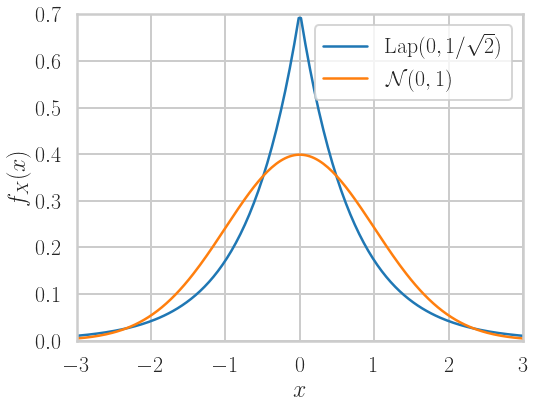

In [6]:
x = np.linspace(-3,3,200)
plt.figure(figsize=(8,6))
plt.plot(x, laplace(loc=0, scale=1/np.sqrt(2)).pdf(x))
plt.plot(x, norm.pdf(x))
plt.xlim([-3,3]), plt.ylim([0,0.7])
plt.legend(["$\mathrm{Lap}(0,1/\sqrt{2})$", "$\mathcal{N}(0,1)$"])
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.show()

### Random number generation from Laplace distribution
* RV $X$ with $\mathrm{Lap}(\mu,\sigma)$ distribution can easily be generated once we have a methods for generating standard Laplacian RV $X_0  \sim \mathrm{Lap}(0,1)$ with cdf $F_0(x)$. 
* Below, we provide two stochastic representations that can be used to generate a standard Laplacian RV $X_0$



#### Method 1

* Let $B$ be a RV with $\Pr(B=\pm 1)=1/2$, $y \sim \mathrm{Exp}(1)$ and let $B$ be statistically independent of $Y$. Then it holds that
$$
X_0 = B \cdot  Y  \sim \mathrm{Lap}(0,1)
$$

* One can state it as follows: let $Y_1$ and $Y_2$ be independent RV-s from  $\mathrm{Exp}(1)$. Then $X_0= Y_1 - Y_2 \sim  \mathrm{Lap}(0, 1)$. *You will prove this property* later in the exercise problems.

#### Method 2
$\mathrm{Lap}(0,\sigma)$ belongs to the family of scale mixture of gaussians:
* if $\tau \sim \mathrm{Exp}(1/(2 \sigma^2))$ and $Y  \sim \mathcal N(0,1)$ and $\tau$ is statistically independent of $Y$, then $X=_d \sqrt{\tau} Y$

The function below return a sample (or samples) from the "standard Laplacian" distribution using Method 1:

In [6]:
def laprnd(n, m):
    return np.random.exponential(size=(n,m),scale=1.0) - np.random.exponential(size=(n,m),scale=1.0)

We can then compare samples from our function to the true PDF

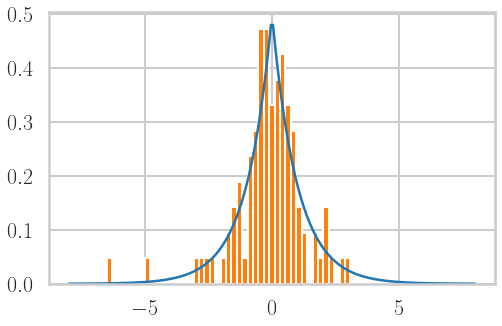

In [9]:
n = 1000
x = np.linspace(-8, 8, 200)
plt.figure(figsize=(8,5))
plt.plot(x,laplace.pdf(x))
plt.hist(laprnd(n,1), 75, range=[-8,8], density=True)
plt.plot()
plt.show()

***
## 3. Uniform distribution

* A continuous RV $X$ with a support on $[a,b]$, where $-\infty<a<b<\infty$, is said to have a *uniform distribution* if its pdf is of the form 
$$
f_X(x) = \frac{1}{b-a},\quad a\leq x \leq b
$$

* The parameters are the minimum value $a$ and the maximum value $b$ of the support. We denote this case by $X \sim \mathrm{Unif}(a,b)$.

* The uniform distribution is commonly used to model the quantization error in digital signal processing or the pase of a complex random variable $X = R e^{\jmath \Theta}$, $\Theta \sim \mathrm{Unif}(-\pi,\pi)$.


Since the distribution is symmetric, one has that $\gamma_1(X) = 0$. Other moments are
* Mean: $\mathrm{E}[X] = \int_a^b x \, \frac{1}{b-a} \mathrm{d} x =  \frac 1 2 (a+b)$
* Variance: $$ \mathrm{var}(X)=   \int_a^b x^2 \frac{1}{b-a}\mathrm{d} x  - \frac{(a+b)^2}{4} =  \frac{1}{12}(a-b)^2$$
* Excess kurtosis: $$\gamma_2^{\mathrm{ex}}(X)=-\frac{6}{5}$$, i.e., the distribution is sub-Gaussian.



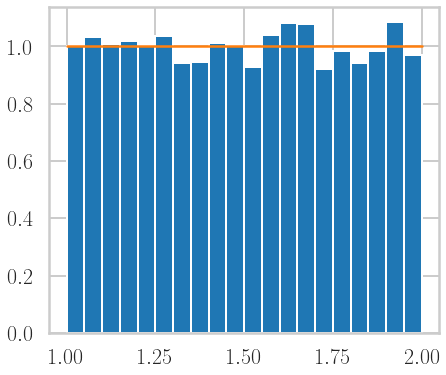

In [14]:
a = 1
b = 2
width = b-a
N = 5000
plt.figure(figsize=(7,6))
plt.hist(uniform(loc=a,scale=width).rvs(N), bins=20,density=True)
x = np.linspace(a,b,5)
plt.plot(x,uniform(loc=a,scale=width).pdf(x))
plt.show()

## 4 Poisson distribution

* A discrete RV $X$ with a value set $S = \mathbb{N}=\{0,1,\ldots\}$ has a Poisson distribution when its pdf is
$$
f_X(x)= \frac{\lambda^x}{x!} e^{-\lambda},\quad x\in\mathbb{N}
$$
with parameter $\lambda>0$. We denote this case by $x \sim \mathrm{Poisson}(\lambda)$.

* The poisson distribution (and related Poisson processes) have numerous applications e.g., in communications  (cf. ELEC-C7210 Modeling and analysis of communication networks). 

* The mean is 
$$
\mathrm{E}[X] =\sum_{k=0}^{\infty} k \frac{\lambda^k}{k!}  e^{-\lambda} = \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!}	=  \lambda
$$
where we used the Taylor series: $e^{\lambda} = \sum_{k=0}^{\infty} \lambda^{k}/k!$

* If there are on average $\lambda>0$ occurences of an event during time interval $[0,T_\lambda]$, then one can model the  number of occurrences $X$ during any time interval $[0,t]$, $t\in(0,T_\lambda]$, using the following Poisson distribution
$$
f_{X}(x)= \mathrm{Pr}(X=x)=\frac{\alpha^x e^{-\alpha}}{x!}, x \in \mathbb{N}
$$
with rate parameter now being $\alpha = \lambda \cdot ( t / T_\lambda)$. 

* Note that $\alpha=\lambda$ if $t=T_\lambda$.

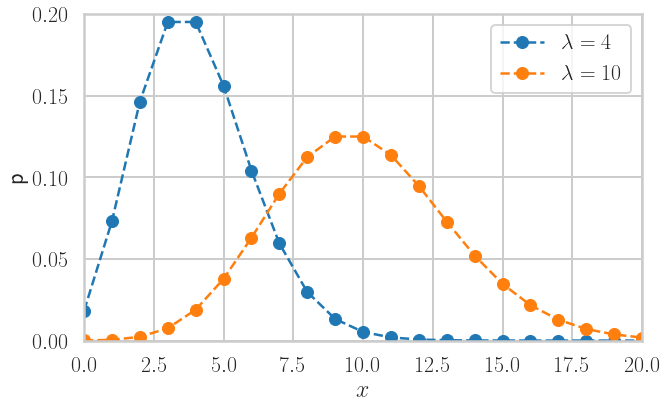

In [17]:
x = np.arange(21)
plt.figure(figsize=(10,6))
plt.plot(x, poisson(mu=4).pmf(x), '--o')
plt.plot(x, poisson(mu=10).pmf(x), '--o')
plt.legend(["$\lambda=4$","$\lambda=10$"])
plt.xlim([0,20]), plt.ylim([0,.2])
plt.xlabel("$x$")
plt.ylabel("p")
plt.show()

## 5 Sample based statistics

* Let $x_1, \ldots, x_n$ denote the  measured data. 

* Often one does not have a good model for data. Commonly made simplifying assumption is that the data is a (particular) realisation of  $n$  IID random variables from some specific distribution $F_X(x)$.   

* Then one can estimate the unknown cdf $F_X(x)$ via the **empirical cdf** (ecdf)  constructed from the data as follows 
$$
F_n(x)= \frac{ \# \{ x_i\le x\} }{n} = \frac{1}{n} \sum_{i=1}^n \mathsf{1}_{\{( - \infty, x]\}}(x_i). 
$$ 

* In python you can use the command <code>ECDF</code> from the module <code>statsmodels</code>. 

In [3]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
x = np.array([3, 3, 1, 4]) # my fake sample x_1, ..., x_4
ecdf = ECDF(x)
ecdf(x)

array([0.75, 0.75, 0.25, 1.  ])

* Other useful tool to inspect the distribution of the data are _histograms_ as well as _QQ-plots_ (short for quantile-quantile plots). 

* Some other basic sample statistics are sample mean, sample variance, sample skewness and sample kurtosis defined next.


statistics | estimate | code |  where
:- |:-|:- |:-
sample mean | $$\bar{x}= \frac{1}{n} \sum_{i=1}^{n} x_i$$ | <code>mean(x)</code> | numpy
sample variance  | $$ s^2  = {\displaystyle \frac{1}{ n}  \sum_{i=1}^n (x_i- \bar x)^2}$$ | <code>var(x)</code> | numpy
sample variance (unbiased) | $$ s^2_u  = \frac{1}{ n-1}  \sum_{i=1}^n (x_i- \bar x)^2$$ | <code>var(x,ddof=1)</code> | numpy 
sample skewness  | $$g_1 = {\displaystyle \frac{\frac{1}{ n}  \sum_{i=1}^n (x_i- \bar x)^3 }{s^{3/2}}}$$ | <code>skew(x)</code> | scipy.stats
sample skewness (unbiased)  | $$G_{1} = \frac{\sqrt{n(n-1)}}{n-2} g_1$$ | <code>skew(x,bias=False) |  scipy.stats 
sample kurtosis | $$g_2 = \frac{\frac{1}{ n}  \sum_{i=1}^n (x_i- \bar x)^4 }{s^{4}} - 3$$ | <code>kurtosis(x,fisher=True)</code>  | scipy.stats 
sample kurtosis (unbiased) | $$G_2 =\frac{(n-1)}{(n-2)(n-3)}((n+1)g_2 + 6) $$ | <code> kurtosis(x,fisher=True,bias=False)</code>  | scipy.stats    

We illustrate the usage of these tools and statistics in the notebook <code>stocks.ipynb</code>, where we inspect the validity of the hypotheis that the daily net returns are Gaussian. 